# <font color='#eb3483'> Exploratory Data Analysis </font>
## <font color='#eb3483'> 2. Quality Assurance (QA) </font>

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) #Set our seaborn aesthetics (we're going to customize our figure size)

#Sometimes pandas gives us a lot of warnings, for the sake of simplicity, let's ignore them for this class
import warnings
warnings.filterwarnings("ignore")

In this section we are going to check the dataset and perform **Quality Assurance (QA)** We are going to check the data for inconsistencies and errors. The goal will be to have a dataset as close as possible to the original but without errors that can lead us to the wrong conclusions.

We will use as input the previous step's output.

In [2]:
vehicles = pd.read_csv("data/vehicles.1.initial_process.csv")

In [3]:
vehicles.shape

(39865, 11)

### <font color='#eb3483'> Duplicates </font>

In this step we try to look for two things:

* Make sure there is no duplicate data that shouldnt be duplicated (for example, ids, or phone numbers).

* Check if there are columns with a high number of duplicate values (low [cardinality](https://en.wikipedia.org/wiki/Cardinality_(SQL_statements))), because that means the information the column can provide is limited. (for example, if 99% of a survey dataset is female, we can't really analyze gender differences).

The entities we defined were:   
    
- make  *(All Toyota cars)*
- make-model *(All toyota Camry cars)*
- make-model-year *(the toyota Camry of 2015)*
- make-year *(All toyota cars manufactured in 2014)*

The only entity that shouldnt be duplicated is the specific car (make-model-year).

In [5]:
vehicles['unique_model'] = vehicles.make.str.cat(
    [vehicles.model, vehicles.year.apply(str)],sep='-')
vehicles.head()

,co2,consumption_mpg,cylinders,displacement,drive,fuel,make,model,transmission,vehicle_class,year,unique_model
0,423.190476,21,4.0,2.0,Rear-Wheel Drive,Regular,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985,Alfa Romeo-Spider Veloce 2000-1985
1,807.909091,11,12.0,4.9,Rear-Wheel Drive,Regular,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985,Ferrari-Testarossa-1985
2,329.148148,27,4.0,2.2,Front-Wheel Drive,Regular,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985,Dodge-Charger-1985
3,807.909091,11,8.0,5.2,Rear-Wheel Drive,Regular,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985,Dodge-B150/B250 Wagon 2WD-1985
4,467.736842,19,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993,Subaru-Legacy AWD Turbo-1993


In [6]:
vehicles[["make", "model", "year", "unique_model"]].head()

,make,model,year,unique_model
0,Alfa Romeo,Spider Veloce 2000,1985,Alfa Romeo-Spider Veloce 2000-1985
1,Ferrari,Testarossa,1985,Ferrari-Testarossa-1985
2,Dodge,Charger,1985,Dodge-Charger-1985
3,Dodge,B150/B250 Wagon 2WD,1985,Dodge-B150/B250 Wagon 2WD-1985
4,Subaru,Legacy AWD Turbo,1993,Subaru-Legacy AWD Turbo-1993


In [8]:
vehicles.unique_model.value_counts().head()

Jeep-Cherokee/Wagoneer-1985      24
GMC-C15 Pickup 2WD-1984          19
Chevrolet-C10 Pickup 2WD-1984    19
Ford-F150 Pickup 2WD-1984        19
Chevrolet-S10 Pickup 2WD-1984    18
Name: unique_model, dtype: int64

Oh! We see there seems to be many cars with the same unique model! Lets check one out.

In [9]:
vehicles[vehicles.unique_model=='Jeep-Cherokee/Wagoneer-1985'].head()

,co2,consumption_mpg,cylinders,displacement,drive,fuel,make,model,transmission,vehicle_class,year,unique_model
735,467.736842,19,4.0,2.5,Rear-Wheel Drive,Regular,Jeep,Cherokee/Wagoneer,Automatic 3-spd,Special Purpose Vehicle 2WD,1985,Jeep-Cherokee/Wagoneer-1985
746,403.954545,22,4.0,2.5,Rear-Wheel Drive,Regular,Jeep,Cherokee/Wagoneer,Manual 4-spd,Special Purpose Vehicle 2WD,1985,Jeep-Cherokee/Wagoneer-1985
757,467.736842,19,4.0,2.5,Rear-Wheel Drive,Regular,Jeep,Cherokee/Wagoneer,Manual 4-spd,Special Purpose Vehicle 2WD,1985,Jeep-Cherokee/Wagoneer-1985
768,444.350000,20,4.0,2.5,Rear-Wheel Drive,Regular,Jeep,Cherokee/Wagoneer,Manual 5-spd,Special Purpose Vehicle 2WD,1985,Jeep-Cherokee/Wagoneer-1985
780,592.466667,15,6.0,2.8,Rear-Wheel Drive,Regular,Jeep,Cherokee/Wagoneer,Automatic 3-spd,Special Purpose Vehicle 2WD,1985,Jeep-Cherokee/Wagoneer-1985


We see that each unique car comes in different configurations (4 or 5 speeds, manual versus automatic).
So we are only going to consider true duplicates as those rows that are completely unique.

We can remove the duplicates with `drop_duplicates()`

In [12]:
vehicles[vehicles.duplicated()].shape

(1506, 12)

In [13]:
vehicles = vehicles.drop_duplicates()
vehicles.shape

(38359, 12)

Now we can delete the unique_model column.

In [14]:
del vehicles['unique_model']

Now we need to check if there are categorical variables with few repeated values (high cardinality) many repeated values (low cardinality).

In [20]:
n_records = len(vehicles)

def duplicate_values_col(df):
    for column in df:
        column_counts = df[column].value_counts()
        most_common = column_counts.iloc[0]
        least_common = column_counts.iloc[-1]
        print("{}({}) | COMMON: {:.2f}%| UNCOMMON:{} observation/s".format(
            df[column].name,
            df[column].dtype,
            100 * most_common / (1.0 * n_records),
            least_common,
        ))

duplicate_values_col(vehicles)

co2(float64) | COMMON: 8.09%| UNCOMMON:1 observation/s
consumption_mpg(int64) | COMMON: 9.57%| UNCOMMON:1 observation/s
cylinders(float64) | COMMON: 38.17%| UNCOMMON:9 observation/s
displacement(float64) | COMMON: 10.08%| UNCOMMON:1 observation/s
drive(object) | COMMON: 35.06%| UNCOMMON:1 observation/s
fuel(object) | COMMON: 64.15%| UNCOMMON:3 observation/s
make(object) | COMMON: 9.79%| UNCOMMON:1 observation/s
model(object) | COMMON: 0.53%| UNCOMMON:1 observation/s
transmission(object) | COMMON: 27.61%| UNCOMMON:2 observation/s
vehicle_class(object) | COMMON: 14.40%| UNCOMMON:1 observation/s
year(int64) | COMMON: 3.63%| UNCOMMON:285 observation/s


We see that the columns `drive, transmission, cylinders and fuel_type` may have a low cardinality issue. In reality  30% of repeated values is not that bad, it would be worse if 80% of the observations had the same value. Same way, we see that the column `model` has a high cardinality.

In [21]:
vehicles.drive.value_counts(normalize=True)

Front-Wheel Drive             0.358021
Rear-Wheel Drive              0.349742
4-Wheel or All-Wheel Drive    0.170598
All-Wheel Drive               0.070523
4-Wheel Drive                 0.034370
2-Wheel Drive                 0.010969
Part-time 4-Wheel Drive       0.005750
Automatic (A1)                0.000027
Name: drive, dtype: float64

We see that the column `drive` seems ok, because most cars have a 2-wheel drive, whether its the front or the rear wheel. To quickly plot our analysis we can use some of pandas built in plotting functionality. Series and dataframes have a plot, let's take a quick peak at the function.

In [22]:
pd.Series.plot?

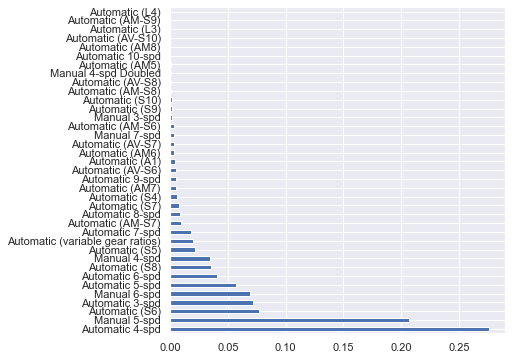

In [23]:
vehicles.transmission.value_counts(normalize=True).plot.barh();

Even though the column `transmission` has a low cardinality, we see that most values belong to two main classes (automatic and manual).

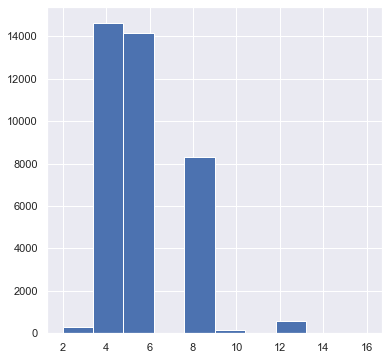

In [24]:
vehicles.cylinders.hist();

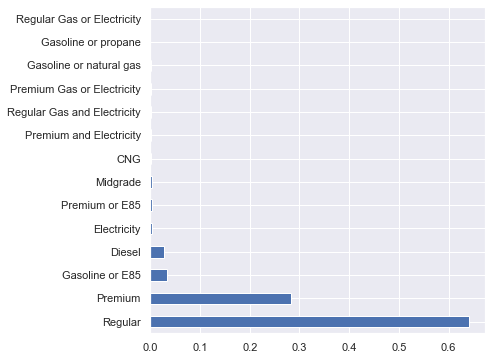

In [25]:
vehicles.fuel.value_counts(normalize=True).plot.barh();

We see the `fuel_type` column might have a cardinality issue because 65% of the observations have `Regular` fuel

### <font color='#eb3483'> Missing Values </font>

Let's check how many values each of our column are missing

In [26]:
n_records = len(vehicles)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(vehicles)

co2 | 0.0 | float64
consumption_mpg | 0.0 | int64
cylinders | 0.004379676216793972 | float64
displacement | 0.004327537214213092 | float64
drive | 0.02077739252848093 | object
fuel | 0.0 | object
make | 0.0 | object
model | 0.0 | object
transmission | 0.00028676451419484345 | object
vehicle_class | 0.0 | object
year | 0.0 | int64


We see that even though the fields `ylinders, displacement, drivce and transmission` have missing values, the amounts are very low. (highest one is driver with 2.1% missing).

### <font color='#eb3483'> Extreme values (outliers) </font>

Extreme values are those values that are different than the variable distribution, and estimating summary statistics for a column with outliers yields unreliable results.

One common practice is to consider outliers those values with a z score higher than 3 (that means, they are 3 standard deviations   bigger or smaller than the mean.

z score is defined as:

$$z(x)= \frac{x-\mu}{\sigma}$$

In [27]:
# we can take a sample column to see its outliers
column = "consumption_mpg"
print(f"the average for column {column} is {vehicles[column].mean()}")
#we consider outliers those observations with a z score (absolute) greater than 3
vehicles[(np.abs(stats.zscore(vehicles[column])) > 3)].head()

the average for column consumption_mpg is 20.477488985635706


,co2,consumption_mpg,cylinders,displacement,drive,fuel,make,model,transmission,vehicle_class,year
825,189.085106,47,3.0,1.0,Front-Wheel Drive,Regular,Geo,Metro XFI,Manual 5-spd,Subcompact Cars,1994
832,206.674419,43,4.0,1.5,Front-Wheel Drive,Regular,Honda,Civic HB VX,Manual 5-spd,Subcompact Cars,1994
1895,206.674419,43,4.0,1.5,Front-Wheel Drive,Regular,Honda,Civic HB VX,Manual 5-spd,Subcompact Cars,1995
6230,167.679245,53,3.0,1.0,Front-Wheel Drive,Regular,Honda,Insight,Manual 5-spd,Two Seaters,2000
7138,0.000000,85,NaN,NaN,NaN,Electricity,Nissan,Altra EV,NaN,Midsize Station Wagons,2000


In [29]:
def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(vehicles)

co2 | 391 | float64
consumption_mpg | 255 | int64
cylinders | 0 | float64
displacement | 0 | float64
year | 0 | int64


We see that the variables `co2 and consumption_mpg` have outliers, we'll plot them to visualize them better.

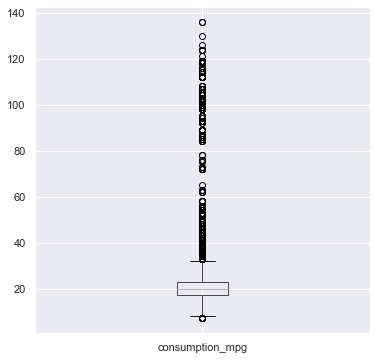

In [30]:
vehicles.boxplot(column='consumption_mpg');

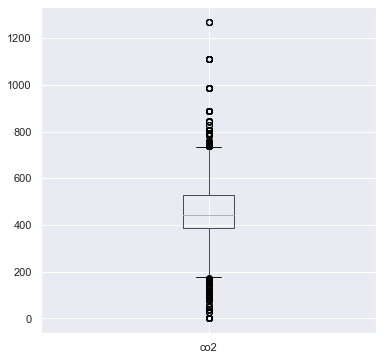

In [31]:
vehicles.boxplot(column='co2');

We see that there are some cars with no fuel consumption at all! And also cars that dont pollute at all!
Maybe there are cars that dont run on gas in the dataset?

In [32]:
vehicles[vehicles.co2==0].fuel.unique()

array(['Electricity'], dtype=object)

In [33]:
vehicles.fuel.unique()

array(['Regular', 'Premium', 'Diesel', 'CNG', 'Gasoline or natural gas',
       'Gasoline or E85', 'Electricity', 'Gasoline or propane',
       'Premium or E85', 'Midgrade', 'Premium Gas or Electricity',
       'Regular Gas and Electricity', 'Premium and Electricity',
       'Regular Gas or Electricity'], dtype=object)

We see that in this dataset there are hybrid and electric vehicles. Given how the goal is to analyze cars regarding their consumption and how pollutant they are, we are going to remove those cars from the dataset.

In [34]:
non_electric_vehicles = vehicles[vehicles.co2>0]

Now that we have removed those cars, we can recheck the dataset

In [35]:
outliers_col(non_electric_vehicles)

co2 | 235 | float64
consumption_mpg | 440 | int64
cylinders | 0 | float64
displacement | 0 | float64
year | 0 | int64


We see there are still outliers in the columns `co2 and consumption_mpg`. Maybe the outliers are the hybrid cars? In that case it wouldnt make sense to remove them, since they would be valid observations.

In [36]:
non_electric_vehicles[
    np.abs(stats.zscore(non_electric_vehicles["consumption_mpg"])) > 3
].fuel.value_counts(normalize=True)

Regular                        0.713636
Diesel                         0.147727
Regular Gas and Electricity    0.059091
Premium                        0.050000
Premium Gas or Electricity     0.018182
Regular Gas or Electricity     0.006818
Premium and Electricity        0.004545
Name: fuel, dtype: float64

We see there are outliers both in hybrid and regular fuel cars, so they are real outliers.

In [37]:
duplicate_values_col(non_electric_vehicles)

co2(float64) | COMMON: 8.09%| UNCOMMON:1 observation/s
consumption_mpg(int64) | COMMON: 9.57%| UNCOMMON:2 observation/s
cylinders(float64) | COMMON: 38.17%| UNCOMMON:9 observation/s
displacement(float64) | COMMON: 10.08%| UNCOMMON:4 observation/s
drive(object) | COMMON: 34.90%| UNCOMMON:1 observation/s
fuel(object) | COMMON: 64.15%| UNCOMMON:3 observation/s
make(object) | COMMON: 9.77%| UNCOMMON:1 observation/s
model(object) | COMMON: 0.53%| UNCOMMON:1 observation/s
transmission(object) | COMMON: 27.61%| UNCOMMON:2 observation/s
vehicle_class(object) | COMMON: 14.37%| UNCOMMON:1 observation/s
year(int64) | COMMON: 3.63%| UNCOMMON:285 observation/s


In [38]:
missing_values_df(non_electric_vehicles)

co2 | 0.0 | float64
consumption_mpg | 0.0 | int64
cylinders | 7.820850387132094e-05 | float64
displacement | 5.213900258088063e-05 | float64
drive | 0.020568836518157406 | object
fuel | 0.0 | object
make | 0.0 | object
model | 0.0 | object
transmission | 5.213900258088063e-05 | object
vehicle_class | 0.0 | object
year | 0.0 | int64


Now that we dont have the electric cars we see that there are basically no missing values save for the `drive` column.

### <font color='#eb3483'> Conclusion </font>
- There are 1506 duplicate rows (we have removed them)
- The variables `cylinders, displacement, drive and transmission` have missing values
- The variable `fuel_type` has a dominant class (65% of cars have `Regular` fuel)
- There are outliers in the variables `co2 and consumption_mpg`
- There are hybrid and electric cars (we have remove the purely electric cars because they dont pollute).

We export the modified dataset (again, without overwriting anything)

In [39]:
non_electric_vehicles.to_csv("data/vehicles.2.clean.csv", index=False)